In [2]:
#Importacion de las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage

1)Preprocesar los datos

Carga de datos

In [3]:
df = pd.read_csv('customer_data.csv')
df.head(4)

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros


Ver info importante del dataset 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

ID Cliente                        0
Edad                              0
Ingresos Anuales (k$)             0
Puntuación de Gasto (1-100)       0
Categoría de Producto Favorito    0
dtype: int64

Ver la descrip de las estadísticas básicas del dataset

In [6]:
df.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [7]:
df['Categoría de Producto Favorito'].unique()

array(['Libros', 'Hogar', 'Electrónica', 'Alimentos', 'Ropa'],
      dtype=object)

Cambiar la cat de producto fav a int

In [8]:
mapeo={
    'Libros':1,
    'Hogar':2,
    'Electrónica':3,
    'Alimentos':4,
    'Ropa':5
    
}

df['Categoría de Producto Favorito'] = df['Categoría de Producto Favorito'].map(mapeo)
df

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,1
1,2,69,91,86,2
2,3,46,46,23,3
3,4,32,28,66,1
4,5,60,81,27,3
...,...,...,...,...,...
195,196,69,77,99,1
196,197,30,86,36,3
197,198,58,65,82,3
198,199,20,43,96,4


Normalizar los datos

In [9]:
escala = MinMaxScaler(feature_range=(0,1))
normado = escala.fit_transform(df)
df_normalizado = pd.DataFrame(data=normado,columns=df.columns)
df_normalizado

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,0.000000,0.745098,0.696970,0.469388,0.00
1,0.005025,1.000000,0.717172,0.867347,0.25
2,0.010050,0.549020,0.262626,0.224490,0.50
3,0.015075,0.274510,0.080808,0.663265,0.00
4,0.020101,0.823529,0.616162,0.265306,0.50
...,...,...,...,...,...
195,0.979899,1.000000,0.575758,1.000000,0.00
196,0.984925,0.235294,0.666667,0.357143,0.50
197,0.989950,0.784314,0.454545,0.826531,0.50
198,0.994975,0.039216,0.232323,0.969388,0.75


2)Reduccion de dimensiones con SVD

In [10]:
X= df_normalizado

In [11]:
X_centrado = X - X.mean()

In [12]:
X_centrado

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,-0.500000,0.246569,0.196162,-0.029694,-0.43875
1,-0.494975,0.501471,0.216364,0.368265,-0.18875
2,-0.489950,0.050490,-0.238182,-0.274592,0.06125
3,-0.484925,-0.224020,-0.420000,0.164184,-0.43875
4,-0.479899,0.325000,0.115354,-0.233776,0.06125
...,...,...,...,...,...
195,0.479899,0.501471,0.074949,0.500918,-0.43875
196,0.484925,-0.263235,0.165859,-0.141939,0.06125
197,0.489950,0.285784,-0.046263,0.327449,0.06125
198,0.494975,-0.459314,-0.268485,0.470306,0.31125


SVD

In [13]:
U,s,Vt = np.linalg.svd(X_centrado)

In [34]:
components_svd = Vt
feature_names = df.columns

for i, component in enumerate(components_svd):
    idx_max = np.argmax(np.abs(component))
    feature = feature_names[idx_max]
    loading = component[idx_max]
    print(f"En el componente {i+1} (SVD), la característica más influyente es '{feature}' con loading {loading:.4f}.")

En el componente 1 (SVD), la característica más influyente es 'Categoría de Producto Favorito' con loading 0.8744.
En el componente 2 (SVD), la característica más influyente es 'Puntuación de Gasto (1-100)' con loading 0.6192.
En el componente 3 (SVD), la característica más influyente es 'Edad' con loading 0.8414.
En el componente 4 (SVD), la característica más influyente es 'ID Cliente' con loading 0.9523.
En el componente 5 (SVD), la característica más influyente es 'Ingresos Anuales (k$)' con loading 0.6398.


3)Clustering, implementamos K-Means para segmentar-partir los clientes en dif grupos an base a las similutudes de sus datos, con el fín de identif las tendencias, patrones entre los dist clientes

In [14]:
k = 2 
x_reduc = U[:, :k] @ np.diag(s[:k])

In [15]:
kmeans = KMeans(n_clusters=3,random_state=0)
label_means = kmeans.fit_predict(x_reduc)

4)Gráfico

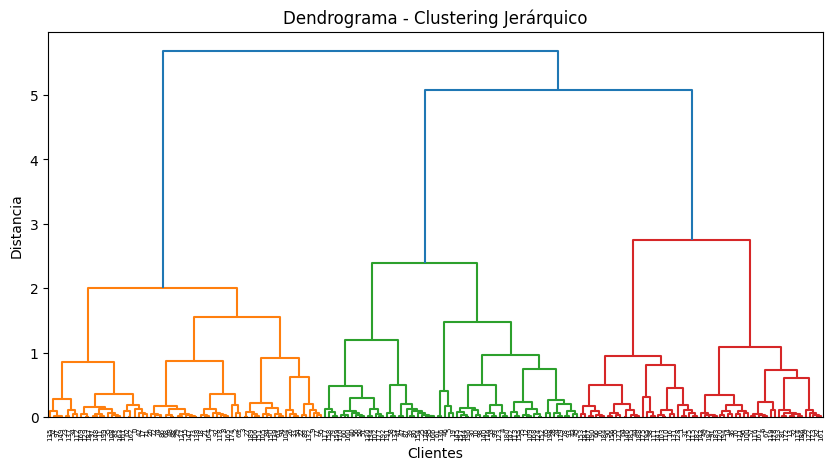

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# linkage: calcula las distancias entre los puntos
Z = linkage(x_reduc, method='ward')  # Usás los datos reducidos

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()


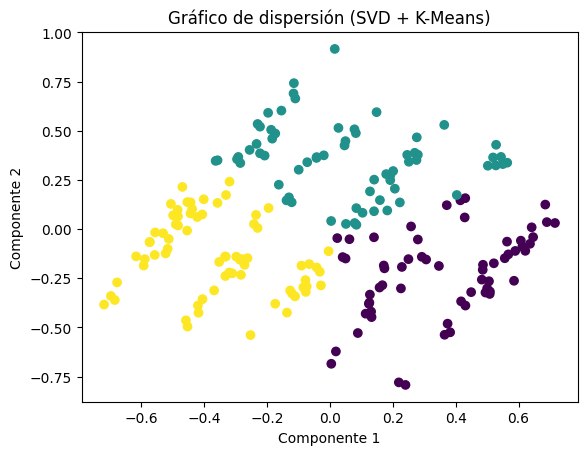

In [23]:
plt.scatter(x_reduc[:, 0], x_reduc[:, 1], c=label_means)
plt.title("Gráfico de dispersión (SVD + K-Means)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


5)Análisis y estrategias de marketing

In [25]:
df['cluster'] = label_means  # o labels_jerarquico
cluster_summary = df.groupby('cluster').mean(numeric_only=True)
print(cluster_summary)


         ID Cliente       Edad  Ingresos Anuales (k$)  \
cluster                                                 
0         97.442623  44.409836              70.573770   
1        117.731343  46.791045              91.179104   
2         87.055556  39.458333              48.638889   

         Puntuación de Gasto (1-100)  Categoría de Producto Favorito  
cluster                                                               
0                          44.524590                        4.426230  
1                          72.611940                        2.298507  
2                          33.347222                        1.763889  


📊 Análisis de clusters
🔹 Cluster 0

    Edad: ~44 años

    Ingresos: ~70k

    Gasto: ~44 (medio)

    Producto favorito: ~4.4

    Perfil: Adultos de mediana edad, ingresos medianos, gasto medio. Les interesan productos más avanzados o específicos (categoría 4).

🔹 Cluster 1

    Edad: ~47 años

    Ingresos: ~91k

    Gasto: ~73 (alto)

    Producto favorito: ~2.3

    Perfil: Adultos mayores con ingresos altos y gasto alto. Segmento premium, muy activo en compras.

🔹 Cluster 2

    Edad: ~39 años

    Ingresos: ~48k

    Gasto: ~33 (bajo)

    Producto favorito: ~1.7

    Perfil: Más jóvenes, ingresos bajos, poco gasto. Segmento más conservador o sensible al precio.

📈 Estrategias de marketing por cluster
🟢 Cluster 1 – Clientes VIP

Estrategia:

    Ofertas exclusivas, programas de fidelización premium.

    Eventos privados, acceso anticipado a nuevos productos.

    Comunicación personalizada (email, WhatsApp Business).

Justificación:

    Este grupo gasta mucho y tiene alto poder adquisitivo. Valoran la atención personalizada y experiencias exclusivas.

🟡 Cluster 0 – Clientes estables

Estrategia:

    Paquetes promocionales de productos categoría 4.

    Descuentos por cantidad o suscripciones mensuales.

    Campañas centradas en valor y durabilidad del producto.

Justificación:

    Grupo con buen poder de compra, aunque moderado en gasto. Se puede incentivar con beneficios por volumen o uso recurrente.

🔴 Cluster 2 – Clientes sensibles al precio

Estrategia:

    Descuentos agresivos, ofertas por tiempo limitado.

    Cuotas sin interés o planes de financiación.

    Envíos gratis y cupones por primeras compras.

Justificación:

    Gastan poco y tienen ingresos bajos. Responden bien a estrategias que reduzcan el costo inicial o percibido.